# Heart disease diagnostic

In [25]:
# Import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [26]:
# Import Dataset
df = pd.read_csv('Heart Disease data.csv')
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [27]:
df.shape

(1025, 14)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [29]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [30]:
# lets find is there any missing values in this data
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [31]:
df = df.dropna(axis=0)
df.shape

(1025, 14)

In [32]:
num_rows = len(df['target'])
print("Number of rows in the 'target' column:", num_rows)

Number of rows in the 'target' column: 1025


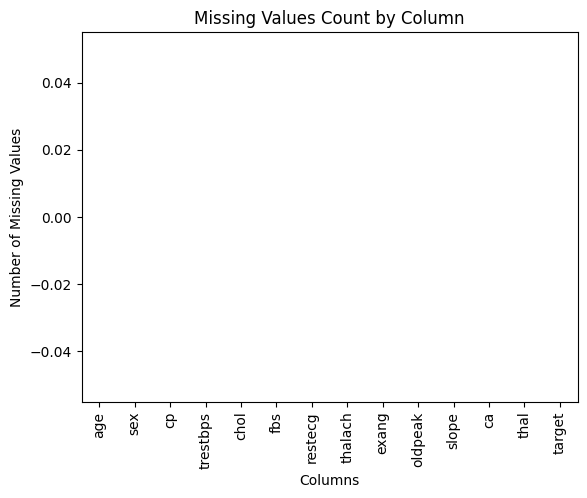

In [33]:
missing_values_count = df.isnull().sum()
missing_values_count.plot(kind='bar')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.title('Missing Values Count by Column')
plt.show()

In [34]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


In [35]:
# Remove duplicates in dataset
df = df.drop_duplicates()

In [36]:
df.shape

(302, 14)

In [37]:
num_rows = len(df['target'])
print("Number of rows in the 'target' column:", num_rows)

Number of rows in the 'target' column: 302


# Explanatory Data Analysis

<Axes: >

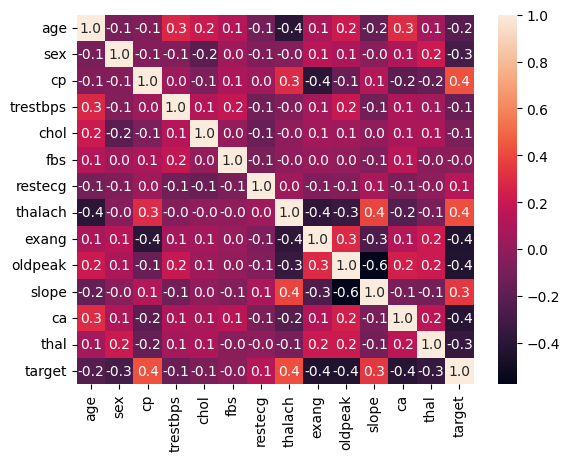

In [38]:
#Visualizing the correlation
sns.heatmap(df.corr(), annot=True, fmt=".1f")

In [39]:
target_counts = df['target'].value_counts()
print(target_counts)

target
1    164
0    138
Name: count, dtype: int64


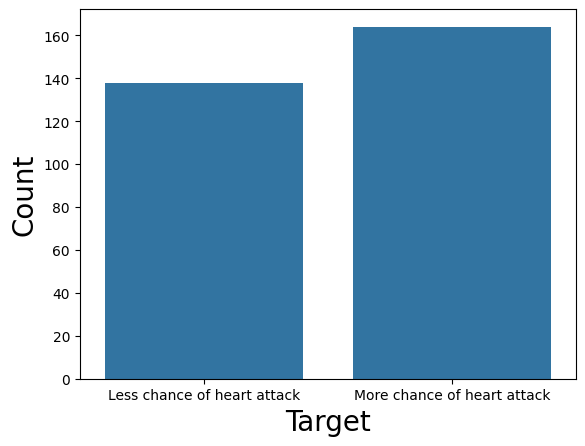

In [40]:
#visualization of showing the count of individuals with less and more chance of heart attack.
sns.countplot(x="target",data=df)
plt.xticks(([0,1]),['Less chance of heart attack', 'More chance of heart attack'])
plt.xlabel('Target',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.show()

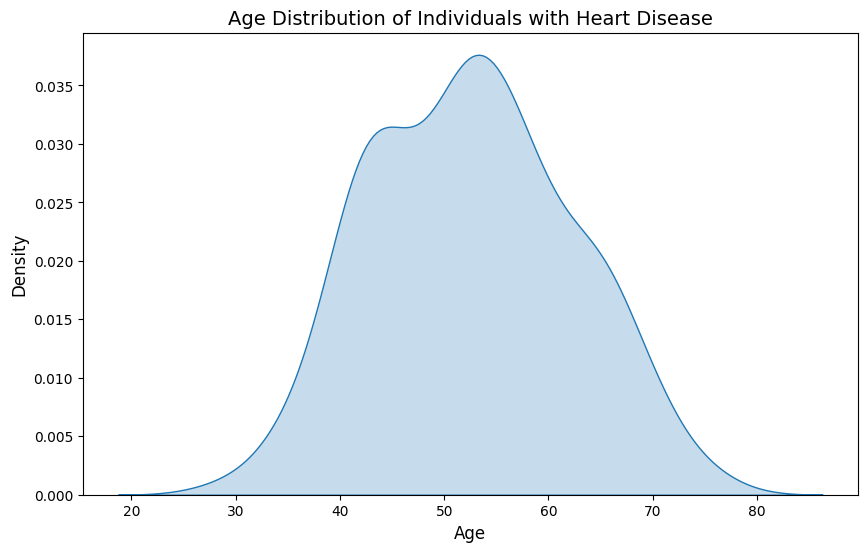

In [41]:
heart_disease_df = df[df['target'] == 1]
plt.figure(figsize=(10, 6))
sns.kdeplot(data=heart_disease_df['age'], fill=True)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title('Age Distribution of Individuals with Heart Disease', fontsize=14)
plt.show()

# Arround the age of 50 the density is high means that there are more people of this age group which has heart-disease.
# this graph is kewed to the right means that there are more individuals with heart disease in the older age groups compared to the younger age groups

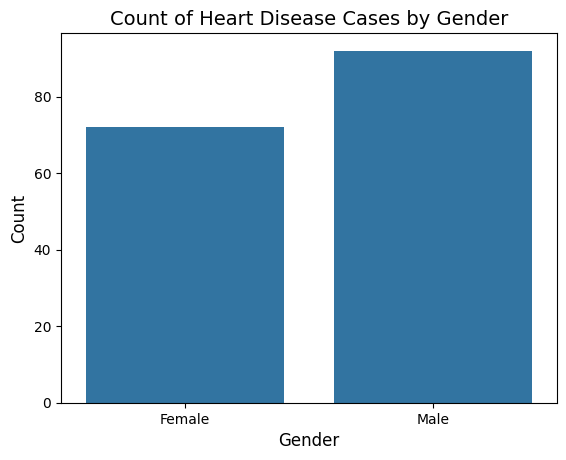

In [42]:
#Now visualizing the count of heart disease cases by gender
heart_disease_df = df[df['target'] == 1]
sns.countplot(x='sex', data=heart_disease_df)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Count of Heart Disease Cases by Gender', fontsize=14)
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'])
plt.show()

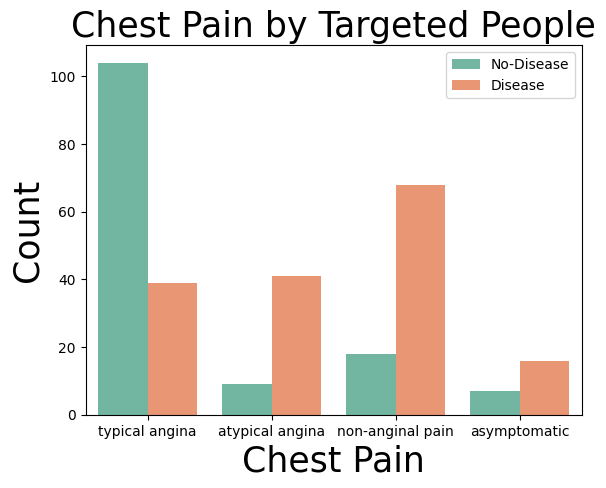

In [43]:
sns.countplot(data=df,x='cp',hue='target',palette='Set2')
plt.legend(labels=['No-Disease', 'Disease'])
plt.xticks(([0,1,2,3]),['typical angina','atypical angina', 'non-anginal pain','asymptomatic'])
plt.xlabel('Chest Pain',fontsize=25)
plt.ylabel('Count',fontsize=25)
plt.title('Chest Pain by Targeted People',fontsize=25)
plt.show()

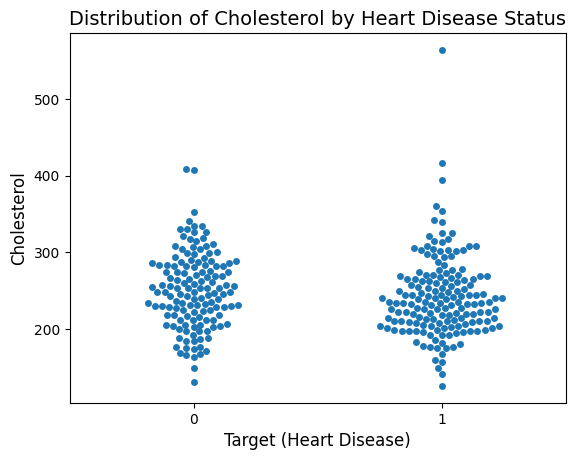

In [44]:
# cholestrol level for indivisuals with and without heart-disease
sns.swarmplot(x='target', y='chol', data=df)
plt.xlabel('Target (Heart Disease)', fontsize=12)
plt.ylabel('Cholesterol', fontsize=12)
plt.title('Distribution of Cholesterol by Heart Disease Status', fontsize=14)
plt.show()

# for indivisuals without heart disease, the cholesterol levels from a distribution wiith a slightly lower central tendency
# for those who have heart disease the cholestrol level is high

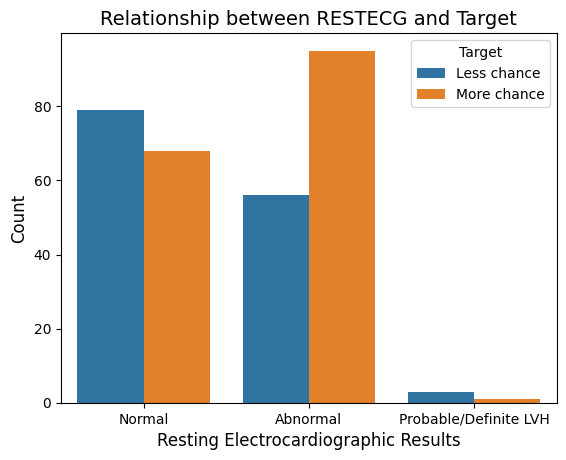

In [45]:
sns.countplot(x='restecg', hue='target', data=df)
plt.xlabel('Resting Electrocardiographic Results', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Relationship between RESTECG and Target', fontsize=14)
plt.legend(title='Target', labels=['Less chance', 'More chance'])
plt.xticks(ticks=[0, 1, 2], labels=['Normal', 'Abnormal', 'Probable/Definite LVH'])
plt.show()

<ipython-input-46-ba5f8362b6ff>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='age_group', y='chol', data=avg_chol_by_age, palette='viridis')


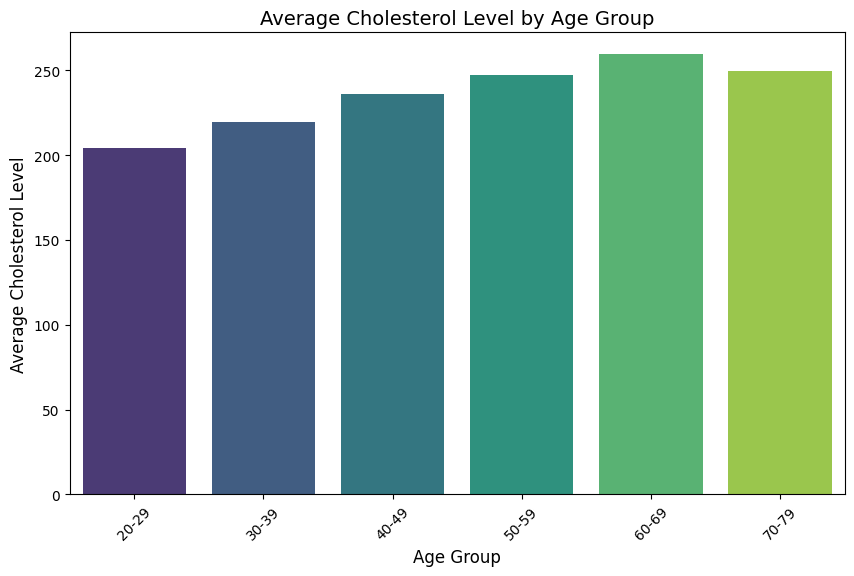

In [46]:
age_bins = np.arange(20, 90, 10)
age_labels = [f'{i}-{i+9}' for i in range(20, 80, 10)]
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)
avg_chol_by_age = df.groupby('age_group')['chol'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='age_group', y='chol', data=avg_chol_by_age, palette='viridis')
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Average Cholesterol Level', fontsize=12)
plt.title('Average Cholesterol Level by Age Group', fontsize=14)
plt.xticks(rotation=45)
plt.show()

<ipython-input-47-1e090fc21d01>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='fbs', y='target', data=df, ci=None, estimator=lambda x: sum(x) / len(x))


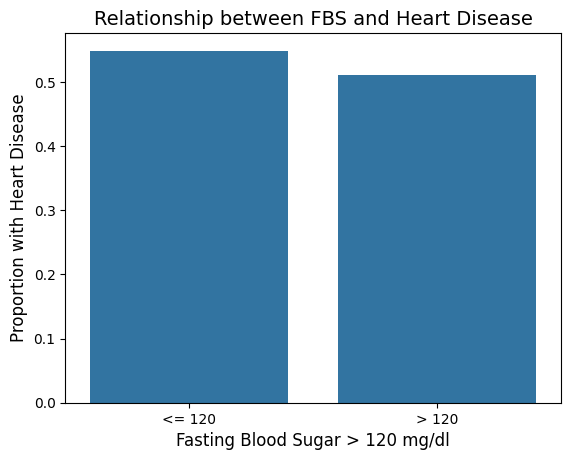

In [47]:
sns.barplot(x='fbs', y='target', data=df, ci=None, estimator=lambda x: sum(x) / len(x))
plt.xlabel('Fasting Blood Sugar > 120 mg/dl', fontsize=12)
plt.ylabel('Proportion with Heart Disease', fontsize=12)
plt.title('Relationship between FBS and Heart Disease', fontsize=14)
plt.xticks(ticks=[0, 1], labels=['<= 120', '> 120'])
plt.show()

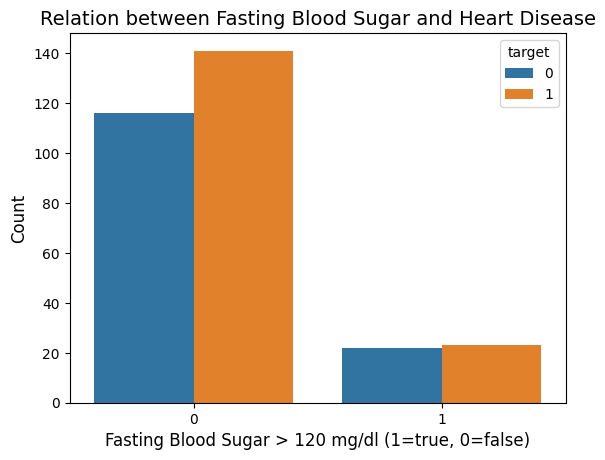

In [48]:
sns.countplot(x='fbs', hue='target', data=df)
plt.xlabel('Fasting Blood Sugar > 120 mg/dl (1=true, 0=false)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Relation between Fasting Blood Sugar and Heart Disease', fontsize=14)
plt.show()